In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Paths

### Combined RE Share and absolute values

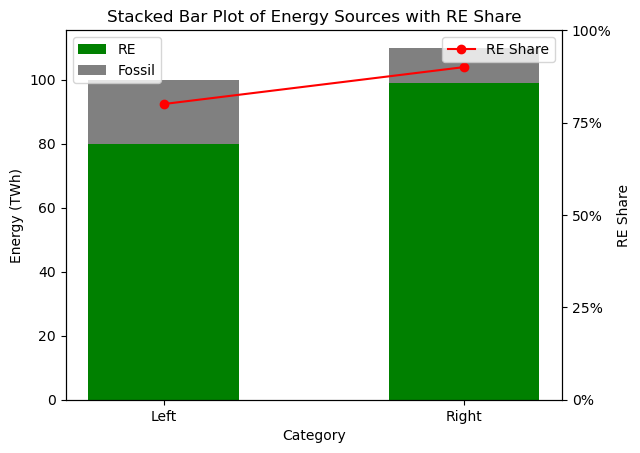

In [2]:
import matplotlib.pyplot as plt

# Data
categories = ['Left', 'Right']
RE = [80, 99]
fossil = [20, 11]

# Colors
colors = ['green', 'grey']

# Width of the bars
bar_width = 0.5

# Create the plot
fig, ax1 = plt.subplots()

# Bottom bars (RE)
ax1.bar(categories, RE, color=colors[0], width=bar_width, label='RE')

# Top bars (fossil)
ax1.bar(categories, fossil, bottom=RE, color=colors[1], width=bar_width, label='Fossil')

# Labels and title
ax1.set_ylabel('Energy (TWh)')
ax1.set_xlabel('Category')
ax1.set_title('Stacked Bar Plot of Energy Sources with RE Share')

# Calculate the share of RE
RE_share = [r / (r + f) for r, f in zip(RE, fossil)]

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(categories, RE_share, color='red', marker='o', linestyle='-', label='RE Share')
ax2.set_ylabel('RE Share')

# Format the secondary y-axis as a percentage
ax2.set_ylim(0, 1)
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax2.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])

# Show the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


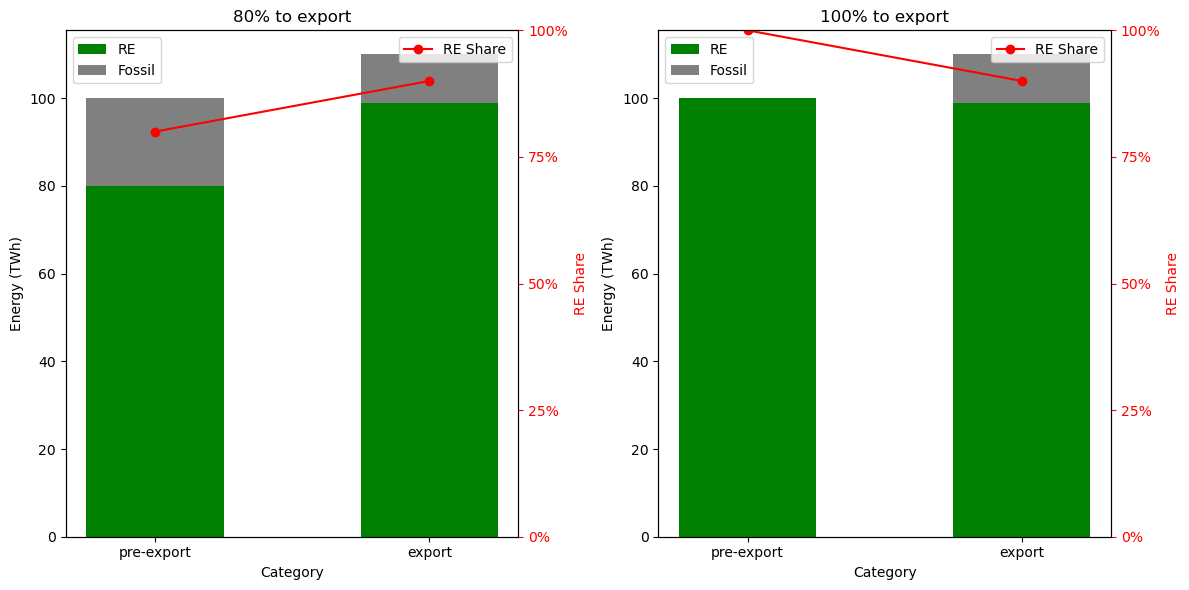

In [3]:
import matplotlib.pyplot as plt

# Updated Data
data1 = {'categories': ['pre-export', 'export'], 'RE': [80, 99], 'fossil': [20, 11]}
data2 = {'categories': ['pre-export', 'export'], 'RE': [100, 99], 'fossil': [0, 11]}

# Colors
colors = ['green', 'grey']

# Function to create the stacked bar plot with secondary y-axis
def plot_stacked_bar(ax, data, title, bar_width=0.5):
    categories = data['categories']
    RE = data['RE']
    fossil = data['fossil']
    
    # Bottom bars (RE)
    ax.bar(categories, RE, color=colors[0], width=bar_width, label='RE')
    
    # Top bars (fossil)
    ax.bar(categories, fossil, bottom=RE, color=colors[1], width=bar_width, label='Fossil')
    
    # Labels and title
    ax.set_ylabel('Energy (TWh)')
    ax.set_xlabel('Category')
    ax.set_title(title)
    
    # Calculate the share of RE
    RE_share = [r / (r + f) for r, f in zip(RE, fossil)]
    
    # Create a secondary y-axis
    ax2 = ax.twinx()
    ax2.plot(categories, RE_share, color='red', marker='o', linestyle='-', label='RE Share')
    ax2.set_ylabel('RE Share', color='red')
    
    # Format the secondary y-axis as a percentage
    ax2.set_ylim(0, 1)
    ax2.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax2.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
    
    # Set the color of the y-axis numbers and label to red
    ax2.yaxis.label.set_color('red')
    ax2.tick_params(axis='y', colors='red')
    
    # Show the legend
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first subplot
plot_stacked_bar(ax1, data1, title='80% to export')

# Plot the second subplot
plot_stacked_bar(ax2, data2, title='100% to export')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### RE share only, different current system

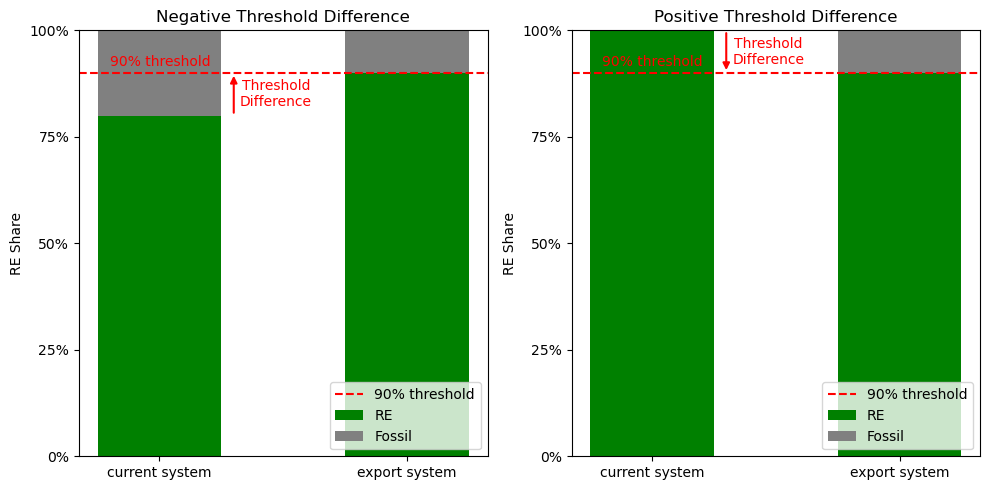

In [ ]:
import matplotlib.pyplot as plt

# Updated Data
data1 = {'categories': ['current system', 'export system'], 'RE': [80, 99], 'fossil': [20, 11]}
data2 = {'categories': ['current system', 'export system'], 'RE': [100, 99], 'fossil': [0, 11]}

# Colors
colors = ['green', 'grey']

# Function to create the stacked bar plot with RE share as the y-axis
def plot_stacked_bar(ax, data, title, bar_width=0.5):
    categories = data['categories']
    RE = data['RE']
    fossil = data['fossil']
    
    # Calculate the share of RE
    RE_share = [r / (r + f) for r, f in zip(RE, fossil)]
    
    # Stack the bars
    ax.bar(categories, RE_share, color=colors[0], width=bar_width, label='RE')
    ax.bar(categories, [1 - share for share in RE_share], bottom=RE_share, color=colors[1], width=bar_width, label='Fossil')
    
    # Labels and title
    ax.set_ylabel('RE Share')
    ax.set_title(title)
    
    # Format the y-axis as a percentage
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])

    # Add vertical dashed line at 90% threshold
    ax.axhline(y=0.9, color='red', linestyle='--', label='90% threshold')
    ax.text(len(categories) - 2.2, 0.91, '90% threshold', color='red', fontsize=10, va='bottom')
    # Add bracket for threshold difference
    ax.annotate('', xy=(0.3, 0.9), xytext=(0.3, RE_share[0]),
                arrowprops={'arrowstyle': '-|>', 'color': 'red', 'lw': 1.5})

    # Add label for the bracket with a line break
    ax.text(0.47, (RE_share[0] + 0.9) / 2, 'Threshold\nDifference', color='red', fontsize=10, va='center', ha='center')

    # Move the legend to the bottom right
    ax.legend(loc='lower right')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Plot the first subplot
plot_stacked_bar(ax1, data1, title='Negative Threshold Difference')

# Plot the second subplot
plot_stacked_bar(ax2, data2, title='Positive Threshold Difference')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# fig.savefig(snakemake.output.threshold_diff, bbox_inches="tight")
# fig.savefig(snakemake.output.threshold_diff_png, bbox_inches="tight", dpi=300)

### RE share only, same current system but different threshold

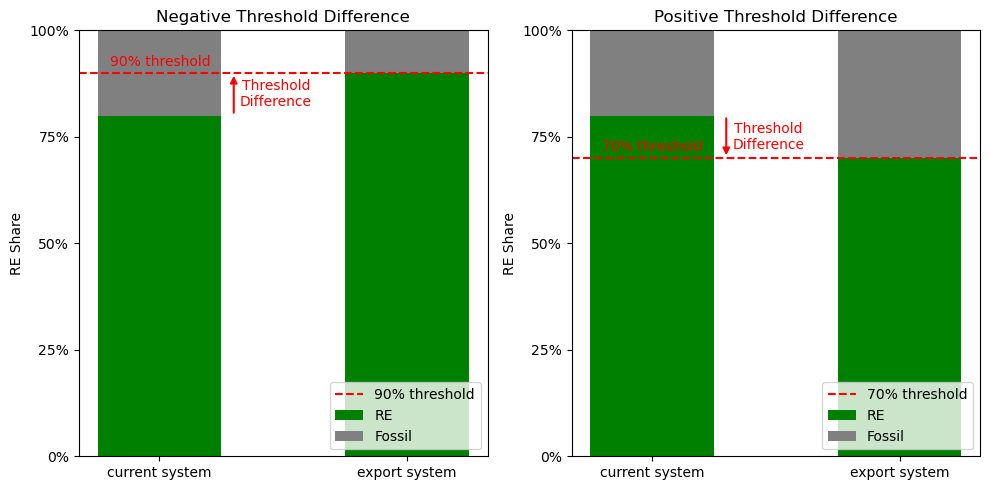

In [6]:
import matplotlib.pyplot as plt

# Updated Data
data1 = {'categories': ['current system', 'export system'], 'RE': [80, 99], 'fossil': [20, 11]}
data2 = {'categories': ['current system', 'export system'], 'RE': [80, 70], 'fossil': [20, 30]}  # 70% RE, 30% fossil

# Colors
colors = ['green', 'grey']

# Function to create the stacked bar plot with RE share as the y-axis
def plot_stacked_bar(ax, data, title, threshold, bar_width=0.5):
    categories = data['categories']
    RE = data['RE']
    fossil = data['fossil']
    
    # Calculate the share of RE
    RE_share = [r / (r + f) for r, f in zip(RE, fossil)]
    
    # Stack the bars
    ax.bar(categories, RE_share, color=colors[0], width=bar_width, label='RE')
    ax.bar(categories, [1 - share for share in RE_share], bottom=RE_share, color=colors[1], width=bar_width, label='Fossil')
    
    # Labels and title
    ax.set_ylabel('RE Share')
    ax.set_title(title)
    
    # Format the y-axis as a percentage
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])

    # Add vertical dashed line at the specified threshold
    ax.axhline(y=threshold, color='red', linestyle='--', label=f'{int(threshold*100)}% threshold')
    ax.text(len(categories) - 2.2, threshold + 0.01, f'{int(threshold*100)}% threshold', color='red', fontsize=10, va='bottom')
    

    # Add bracket for threshold difference for the first bar (current system)
    ax.annotate('', xy=(0.3, threshold), xytext=(0.3, RE_share[0]),
                arrowprops={'arrowstyle': '-|>', 'color': 'red', 'lw': 1.5})

    # Add label for the bracket with a line break
    ax.text(0.47, (RE_share[0] + threshold) / 2, 'Threshold\nDifference', color='red', fontsize=10, va='center', ha='center')

    # Move the legend to the bottom right
    ax.legend(loc='lower right')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot with a 90% threshold
plot_stacked_bar(ax1, data1, title='Negative Threshold Difference', threshold=0.9)

# Plot the second subplot with a 70% threshold
plot_stacked_bar(ax2, data2, title='Positive Threshold Difference', threshold=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig(snakemake.output.threshold_diff, bbox_inches="tight")
fig.savefig(snakemake.output.threshold_diff_png, bbox_inches="tight", dpi=300)
